_You can use this as a guide. I tried to make it general, but as each project has its own peculiarity you'll have to deal with that and adapt. Change the code, make it yours._

> **1.0 - Describe Data - Data cleaning.**
>
> **2.0 - Create Hypothesis to validate with data (future insights).**
>
> **3.0 - Feature Engineering - "Data Exploration" (Feature Extraction/ Construction/ Selection... Feature Learning).**
>
> **4.0 - EDA (Exploratory Data Analysis) - Finding out Insights/ Answers to business questions.**
>
> **5.0 - Machine Learning (if needed)**

## Agenda

[Business Understanding](#Business-Understanding)<br> 
&emsp;[Business Questions](#Business-Questions)<br>
&emsp;[Hypothesis](#Hypothesis)<br>

[Imports](#Imports)<br>
&emsp;[Helper Functions and Classes](#Helper-Functions-and-Classes)<br>
&emsp;&emsp;[Analysis](#Analysis)<br>
&emsp;&emsp;[Graph](#Graph)<br>
&emsp;&emsp;[Directory](#Directory)<br>
&emsp;&emsp;[Database](#Database)<br>

[Settings](#Settings)<br>

[Loading Data](#Loading-Data)<br>

[Describing Data](#Describing-Data)<br>
&emsp;[Renaming Columns](#Renaming-Columns)<br>
&emsp;[Dealing with Missing Values](#Dealing-with-Missing-Values)<br>
&emsp;[Remap values](#Remap-values)<br>
&emsp;[Change Data Types](#Change-Data-Types)<br>
&emsp;[Duplicates](#Duplicates)<br>
&emsp;[Descriptive Statistics](#Descriptive-Statistics)<br>
&emsp;&emsp;[Numerical Attributes](#Numerical-Attributes)<br>
&emsp;&emsp;[Categorical Attributes](#Categorical-Attributes)<br>

[Feature Engineering](#Feature-Engineering)<br>
&emsp;[new_column_name_1](#new_column_name_1)<br>
&emsp;[new_column_name_2](#new_column_name_2)<br>

[Filters](#Filters)<br>
&emsp;[Column Selection](#Column-Selection)<br>
&emsp;[Row Selection](#Row-Selection)<br>

[Business Answers](#Business-Answers)<br>

[Exploratory Data Analysis](#Exploratory-Data-Analysis)<br>
&emsp;[Univariate Analysis](#Univariate-Analysis)<br>
&emsp;&emsp;[Response Variable](#Response-Variable)<br>
&emsp;&emsp;[Numerical Variables](#Numerical-Variables)<br>
&emsp;&emsp;[Categorical Variables](#Categorical-Variables)<br>
&emsp;[Bivariate Analysis](#Bivariate-Analysis)<br>
&emsp;[Multivariate Analysis](#Multivariate-Analysis)<br>
&emsp;&emsp;[Numerical](#Numerical)<br>
&emsp;&emsp;[Categorical](#Categorical)<br>

[Dificulties and Solutions](#Dificulties-and-Solutions)<br>

[Next Steps](#Next-Steps)<br>

## Business Understanding
[&#8593;](#Agenda)

> **Motivation! What's the context?**
> 
> **What outcome is the company trying to achieve?**
> 
> **Problem - What pain we want to minimize?**
> 
> ---
> 
> **Why?**
> 
> **Potential. What is the potential to solve it?**
> 
> ---
> 
> **What can the company do to achieve it?**
> 
> _"If I prove this right tomorrow how will you apply it in your business?"_
> 
> **Who are the stakeholders?**
> 
> ---
> 
> **What is the deliverable?**


### Business Questions
[&#8593;](#Agenda)

**1.** hypothesis

**2.** hypothesis

**3.** hypothesis

**4.** hypothesis

### Hypothesis
[&#8593;](#Agenda)

#### ['column_name'] hypothesis.

**1.** hypothesis

**2.** hypothesis

**3.** hypothesis

**4.** hypothesis

#### ['column_name_2'] hypothesis.

**1.** hypothesis

**2.** hypothesis

**3.** hypothesis

**4.** hypothesis

### Imports
[&#8593;](#Agenda)

In [2]:
import pandas as pd
# import inflection
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import os

# util
from IPython.display import Image
from scipy import stats

### Helper Functions and Classes
[&#8593;](#Agenda)

### Analysis
[&#8593;](#Agenda)

In [3]:
def describe_data(data):
    """ Inform Data Dimension. Data Types. Count and % of NaN.

    :param data: pandas.DataFrame
    :return: pandas.DataFrame with columns=['data_types', 'nan_count', 'nan_percentage']
    """

    print(f"Shape: {data.shape}")
    try:
        print(f"Duplicates: {data.duplicated().any()}")
    except Exception as e:
        print(f"Error when searching for duplicates:\n\t{e}")

    is_na = data.isna().sum()
    is_na_percentage = is_na / data.shape[0] * 100
    nan_data_frame = pd.concat([data.dtypes, is_na, is_na_percentage], axis=1)
    nan_data_frame.columns = ['data_types', 'nan_count', 'nan_percentage']
    return nan_data_frame


# 1.2 Dealing with Missing Values
def missing_plot(data, nan_cols, no_nan_col, x=15, y=5, first_graph=True, second_graph=True):
    nan_cols.insert(0, no_nan_col)
    try:
        if first_graph:
            msno.matrix(data[nan_cols], figsize=(x, y))
            plt.show()
        if second_graph:
            msno.bar(data[nan_cols], figsize=(x, y))
            plt.show()
    except Exception as e:
        print(e)
    
    
# 5.1.3. Categorical Variables    
def get_categories(data):
    """ Generate a pandas.DataFrame with distinct values of each column

    :param data: pandas.DataFrame
    :return: pandas.DataFrame with unique values of each column
    """
    df = pd.DataFrame()
    for column in data.columns:
        col = pd.Series(data[column].unique(), name=column)
        df = pd.concat([df, col], axis=1).fillna('')
    return df

# 5.3 Multivariate Analysis 
#  5.3.2. Categorical Attributes
def cramer_v( x, y ):
    confusion_matrix = pd.crosstab( x, y ).to_numpy() 
    n = confusion_matrix.sum()
    r, k = confusion_matrix.shape
    
    chi2 = stats.chi2_contingency( confusion_matrix )[0]
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) )


def get_categorical_corr(categorical_data):
    categorical_correlation_matrix = {}

    for column in categorical_data.columns:
        correlation_values = []
        for col in categorical_data.columns:
            correlation_values.append(cramer_v(categorical_attributes[column], categorical_attributes[col]))

        categorical_correlation_matrix[column] = correlation_values
    
    categorical_corr = pd.DataFrame(categorical_correlation_matrix)
    categorical_corr = categorical_corr.set_index( categorical_corr.columns )
    return categorical_corr 


def correlation(df, method='pearson'):
    return df.corr(method=method).values[0][1]


def join_paths(paths):
    """ Join two or more paths (folders) into one absolute path

    Parameters
    ----------

    paths : list of folders to be joined.
        Last folder may be a file. E.g.:
        ['data', 'raw', 'e_commerce.csv']

    Returns
    -------

    string with joined paths

    Examples
    --------
    >>> from data_science_lib.dir import join_paths
    >>> print( join_paths(['C:\\Users\\Administrador\\Desktop\\RetailerProject\', 'data', 'raw', 'e_commerce.csv']) )
    C:\\Users\\Administrador\\Desktop\\RetailerProject\\data\\raw\\e_commerce.csv
    """

    if not isinstance(paths, list):
        raise ValueError(f"Pass a list(). {type(paths)} passed instead.")
    elif len(paths) <= 1:
        raise ValueError(f"List with at least 2 paths is needed. Passed a list with {len(paths)} instead")
    else:
        path = paths[0]
        paths_lenght = len(paths)
        for index in range(paths_lenght):
            if index + 1 == paths_lenght: break
            path = os.path.join(path, paths[index + 1])
        return path

### Graph
[&#8593;](#Agenda)

In [4]:
def fig(x=15, y=5, set_as_global=False, reset_to_default=False):
    """ Adjust size of matplotlib figure

    :param x: figure width.
    :param y: figure height.
    :param set_as_global: bool.
        If True, then it sets "x" and "y" axis for all subsequent plots.
    :param reset_to_default: bool.
        If True, then it resets the global figure size back to default.
    """
    if set_as_global:
        plt.rcParams["figure.figsize"] = (x, y)
    elif reset_to_default:
        plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
    else:
        plt.figure(figsize=(x,y))

In [5]:
class Graph:
    def __init__(self):
        self.x = 15
        self.y = 5
        self.box = False
        self.xlabel=None
        self.ylabel=None
        self.xlabel_color="#838383" 
        self.ylabel_color="#838383" 
        self.xticks_color="#838383" 
        self.yticks_color="#838383"
        self.xlabel_size=16 
        self.ylabel_size=16 
        self.xticks_size=12 
        self.yticks_size=12 
        self.xticks_rotation=.9
        self.ticks_axis='both' 
        self.ticks_which='both' 
        self.ticks_length=0
    
    def show(self, **attributes):
        self.update_attribute_values(attributes)
        
        plt.box(self.box)
        plt.tick_params(axis=self.ticks_axis, which=self.ticks_which, length=self.ticks_length)

        plt.xticks(color=self.xticks_color, rotation=self.xticks_rotation, size=self.xticks_size)
        plt.yticks(color=self.yticks_color, size=self.yticks_size)
        plt.xlabel(self.xlabel, color=self.xlabel_color, size=self.xlabel_size)
        plt.ylabel(self.ylabel, color=self.ylabel_color, size=self.ylabel_size)
        
        return self
        
    def update_attribute_values(self, attributes):
        for key in attributes.keys():
            value = self.__dict__.get(key)
            if value is not None:
                self.__dict__[key] = attributes.get(key)
        
    def reset(self):
        self.__init__()
        return self

### Directory
[&#8593;](#Agenda)

In [6]:
class Directory:
    """ A Directory Manager

    Parameters
    ----------

    __file__ : str, name of the current .py or .ipynb file

    is_sub_project : bool, default=False

        - If False, then this is considered a Major Project.
          Thus, project template is "project_name/notebooks"
        - If True, then this is considered one project inside
          a set of projects. Project template looks like:
          "major_project_name/current_project_name/notebooks"
          or
          "consulting_to_company_name/current_project_name/notebooks"

        E.g.: Based on: https://drivendata.github.io/cookiecutter-data-science/

            Project Name            Major Project Name
            |                       |
            - - data                - - data
            |                       |
            - - notebooks           - - project A
                                    |   |
                                    |   - - notebooks
                                    |
                                    - - project B
                                        |
                                        - - notebooks

    data_file_name : str, default="data"
        File name where data is stored.


    Attributes
    ----------

    __file__ : str, name of the current .py or .ipynb file

    THIS_DIR : str, absolute path to {__file__} file

    BASE_DIR : str, absolute path to the Main Directory of the Project

    DATA_DIR : str, absolute path to data directory

    """

    def __init__(self, __file__, is_sub_project=False, data_file_name='data'):
        self.__file__ = __file__
        self.THIS_DIR = os.path.dirname(os.path.abspath(__file__))
        self.BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))
        if is_sub_project:
            self.BASE_DIR = os.path.dirname(self.BASE_DIR)
        self.DATA_DIR = os.path.join(os.path.join(self.BASE_DIR, data_file_name))

    def __str__(self):
        return f'''Directory(__file__ = {self.__file__},
        THIS_DIR = {self.THIS_DIR},
        BASE_DIR = {self.BASE_DIR},
        DATA_DIR = {self.DATA_DIR})'''

### Database
[&#8593;](#Agenda)

In [ ]:
import pymongo


class MongoDB:
    def __init__(self, database='mydb', client="mongodb://localhost:27017/"):
        self.client = pymongo.MongoClient(client)
        self.db = self.client[database]
        self.collections = {}

    def add_collection(self, collection):
        self.collections[collection] = self.db[collection]
        return self

    def drop_collection(self, collection):
        self.db[collection].drop()
        return self

    def drop_collections(self, collections):
        for collection in collections:
            self.db[collection].drop()
        return self

    def databases(self):
        return self.client.list_database_names()

    def collection(self, collection):
        if collection in self.collections:
            return self.collections[collection]
        else:
            self.add_collection(collection)
            return self.collections[collection]

    def collection_names(self):
        return self.db.list_collection_names()

In [ ]:
import psycopg2

class PostgreSQL:
    def __init__(self, host="localhost", user="postgres", password="********", database="postgres"):
        self.conn = psycopg2.connect(host=host, user=user, password=password, database=database)
        self.cursor = self.conn.cursor()

    def execute(self, query, has_return=True):
        self.cursor.execute(query)
        if has_return:
            try:
                return [table for table in self.cursor.fetchall()]
            except Exception as e:
                self.rollback()
                print("Warning: This Query Does Not return results to fetch.\nAssign has_return=False")
                print(f'  {e} from:\n\n{query}')

    def columns(self, table_name):
        self.cursor.execute(F"""SELECT column_name FROM information_schema.columns WHERE table_name = '{table_name}'""")
        return [table[0] for table in self.cursor.fetchall()]

    def tables(self):
        self.cursor.execute("""SELECT table_name FROM information_schema.tables WHERE table_schema = 'public'""")
        return [table[0] for table in self.cursor.fetchall()]

    def rollback(self):
        self.cursor.execute("ROLLBACK;")

    def close(self):
        self.conn.close()


class QueryBuilder:
    def __init__(self):
        self.select_value = ''
        self.from_table_name = ''
        self.where_value = ''
        self.groupby_value = ''
        self.limit_value = ''
        self.having_value = ''
        self.last_query_value = ''

    def select(self, select_arg):
        self.select_value = select_arg
        return self

    def from_table(self, from_arg):
        self.from_table_name = from_arg
        return self

    def where(self, where_arg):
        self.where_value = where_arg
        return self

    def groupby(self, groupby_args):
        self.groupby_value = groupby_args
        return self

    def having(self, having_value):
        self.having_value = having_value

    def limit(self, limit_args):
        self.limit_value = limit_args
        return self

    def reset(self):
        self.select_value = ''
        self.from_table_name = ''
        self.where_value = ''
        self.groupby_value = ''
        self.limit_value = ''
        self.having_value = ''
        return self

    def last_query(self):
        return self.last_query_value

    def build(self, reset=True):
        where_clause = ''
        groupby_clause = ''
        having_clause = ''
        limit_clause = ''

        if self.where_value:
            where_clause = f'WHERE  {self.where_value}'
        if self.groupby_value:
            groupby_clause = f'GROUP BY {self.groupby_value}'
        if self.limit_value:
            limit_clause = f'LIMIT {self.limit_value}'
        if self.having_value:
            having_clause = f'HAVING {self.having_value}'

        self.last_query_value = f"""
           SELECT {self.select_value}
           FROM   {self.from_table_name}
           {where_clause}
           {groupby_clause}
           {having_clause}
           {limit_clause};
        """

        if reset:
            self.reset()

        return self.last_query_value
    
    
def to_pandas(query_result, columns):
    return pd.DataFrame(query_result, columns=columns)

def write_query(file_name, query):
    with open(f'{file_name}.sql', 'w') as file:
        file.write(query)

def read_query(path):      
    with open(f'{path}', 'r') as file:
        return file.read()

## Settings
[&#8593;](#Agenda)

In [8]:
__file__ = "Data Science Pipeline"
directory = Directory(__file__)
print(directory.__str__())

Directory(__file__ = Data Science Pipeline,
        THIS_DIR = C:\Users\Administrador\Desktop\Paulo\data_sience_on_going\data_science_lib\notebooks,
        BASE_DIR = C:\Users\Administrador\Desktop\Paulo\data_sience_on_going\data_science_lib,
        DATA_DIR = C:\Users\Administrador\Desktop\Paulo\data_sience_on_going\data_science_lib\data)


In [ ]:
g = Graph()

## Loading Data
[&#8593;](#Agenda)

In [9]:
%%time
data_path = ""
raw_data = pd.read_csv(data_path, encoding_errors='ignore')
raw_data.head(3)

Wall time: 9.82 s


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High


## Describing Data
[&#8593;](#Agenda)

In [10]:
data = raw_data.copy()

### Renaming Columns
[&#8593;](#Agenda)

[inflection docs](https://inflection.readthedocs.io/en/latest/) &emsp; [lambda](https://www.w3schools.com/python/python_lambda.asp) &emsp; [map](https://www.geeksforgeeks.org/python-map-function/)

In [11]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [12]:
# snakecase = lambda x: inflection.underscore(x)
snakecase = lambda x: str(x).lower().replace(' ', '_').replace('-', '_')
data.columns = map(snakecase, data.columns)
data.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'postal_code', 'market', 'region', 'product_id', 'category',
       'sub_category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority'],
      dtype='object')

> **Data Dimension. Data Types. Check NaN.**

In [13]:
describe_data(data)#.T

Shape: (51290, 24)
Duplicates: False


,data_types,nan_count,nan_percentage
row_id,int64,0,0.00000
order_id,object,0,0.00000
order_date,object,0,0.00000
ship_date,object,0,0.00000
ship_mode,object,0,0.00000
customer_id,object,0,0.00000
customer_name,object,0,0.00000
segment,object,0,0.00000
city,object,0,0.00000
state,object,0,0.00000


### Dealing with Missing Values
[&#8593;](#Agenda)

Shape: (51290, 24)
Duplicates: False


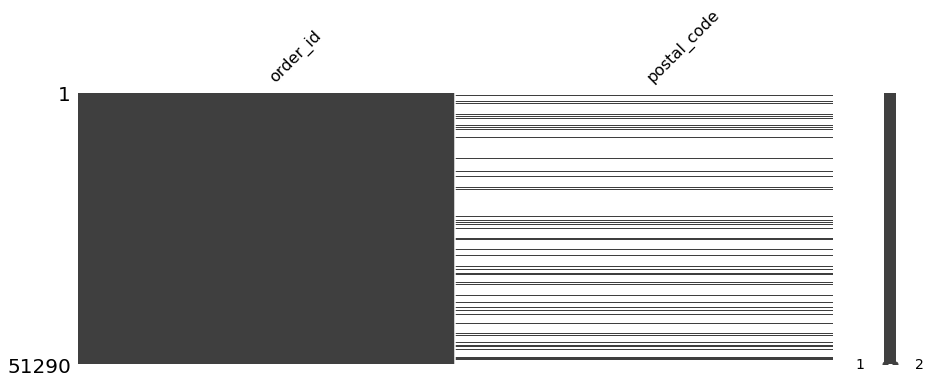

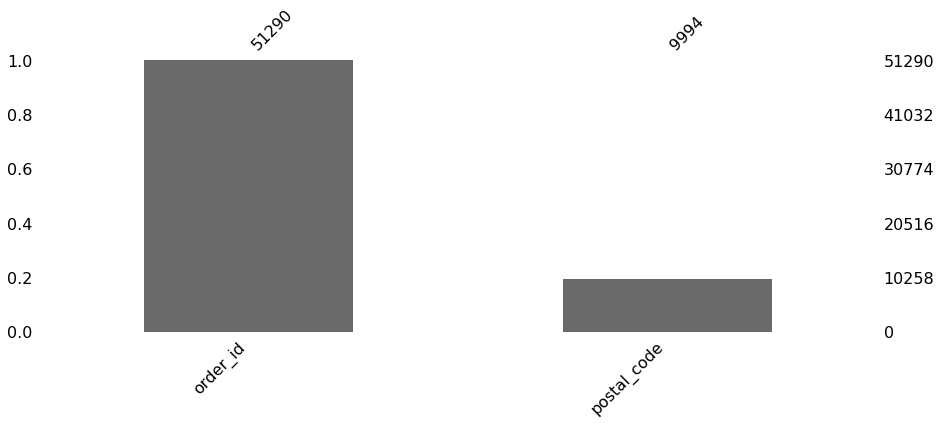

In [15]:
nan_cols = list(describe_data(data).query('nan_percentage > 0').index)
missing_plot(data, nan_cols, "column_with_no_nan")

In [ ]:
# Drop
data.dropna(inplace=True)

# Fill (mean, median, etc...)
data['column_name'].fillna('value_returned_by_function', inplace=True)

# Fill (with some specification)
data['column_name'] = data.apply(lambda x: 'x + value?' if "condition" else "x itself or other value")

### Remap values
[&#8593;](#Agenda)

[replace](https://stackoverflow.com/questions/20250771/remap-values-in-pandas-column-with-a-dict)

In [ ]:
# map
dict_map = {1: 'example_1',  2: 'example_2',  3: 'example_3'}
data['column_name'].map( dict_map )

# replace (map is faster)
data['column_name'].replace("original_value", 'new_value')

### Change Data Types
[&#8593;](#Agenda)

[Other Ways](https://stackoverflow.com/questions/15891038/change-column-type-in-pandas)

In [ ]:
describe_data(data)

In [ ]:
# YES, APPLY BOOLEAN WAY OF LIFE
data['column_name'] = data['column_name'].astype('bool')

In [ ]:
data['column_name'] = data['column_name'].astype( int )

In [16]:
data['order_date'] = pd.to_datetime(data['order_date'])

In [ ]:
describe_data(data)

### Duplicates
[&#8593;](#Agenda)

In [18]:
# Duplicated rows
print("number of duplicates: ", data.duplicated().sum())
duplicated_rows_df = data[data.duplicated(keep=False)]
duplicated_rows_df.sort_values("column_name").head()

number of duplicates:  0


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority


In [ ]:
data.drop_duplicates(inplace=True)

### Descriptive Statistics
[&#8593;](#Agenda)


In [19]:
numerical_attributes = data.select_dtypes( include=['int64', 'float64'] )
categorical_attributes = data.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

#### Numerical Attributes
[&#8593;](#Agenda)


        Explanation

In [31]:
skew = pd.DataFrame(numerical_attributes.apply(lambda x: x.skew()), columns=['skew']).T
kurtosis = pd.DataFrame(numerical_attributes.apply(lambda x: x.kurtosis()), columns=['kurtosis']).T
stats = pd.concat([data.describe(), skew, kurtosis]).round(2).T

def style_specific_cell(x):
    df = pd.DataFrame('', index=x.index, columns=x.columns)
    
    df.iloc[1, 2] = 'background-color: lightblue'
    df.iloc[5, 0] = df.iloc[5, 4] = 'background-color: red'
    df.iloc[0:5, 0] = 'background-color: lightgrey'   
    
    return df

stats.drop(columns='count').style.apply(style_specific_cell, axis=None).format("{:.2f}")

,mean,std,min,25%,50%,75%,max,skew,kurtosis
row_id,25645.50,14806.29,1.00,12823.25,25645.50,38467.75,51290.00,0.00,-1.20
postal_code,55190.38,32063.69,1040.00,23223.00,56430.50,90008.00,99301.00,-0.13,-1.49
sales,246.49,487.57,0.44,30.76,85.05,251.05,22638.48,8.14,176.73
quantity,3.48,2.28,1.00,2.00,3.00,5.00,14.00,1.36,2.28
discount,0.14,0.21,0.00,0.00,0.00,0.20,0.85,1.39,0.72
profit,28.61,174.34,-6599.98,0.00,9.24,36.81,8399.98,4.16,291.41
shipping_cost,26.38,57.30,0.00,2.61,7.79,24.45,933.57,5.86,50.02


#### Categorical Attributes
[&#8593;](#Agenda)

        Explanation

In [32]:
categorical_attributes.apply( lambda x: len(x.unique()) ).sort_values()

segment               3
category              3
ship_mode             4
order_priority        4
market                7
region               13
sub_category         17
country             147
customer_name       795
state              1094
ship_date          1464
customer_id        1590
city               3635
product_name       3788
product_id        10292
order_id          25035
dtype: int64

In [33]:
cols = ['category1', 'category2']
get_categories(categorical_attributes[cols])

,segment,category
0,Consumer,Office Supplies
1,Home Office,Furniture
2,Corporate,Technology


In [34]:
numerical_columns = numerical_attributes.select_dtypes(include=['int64','float64'], exclude=['bool']).columns

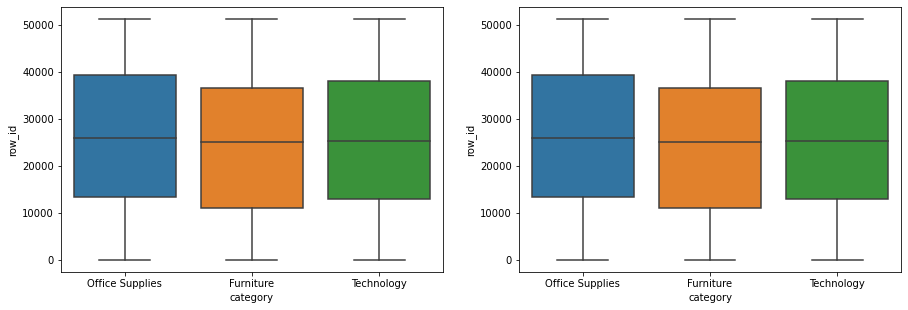

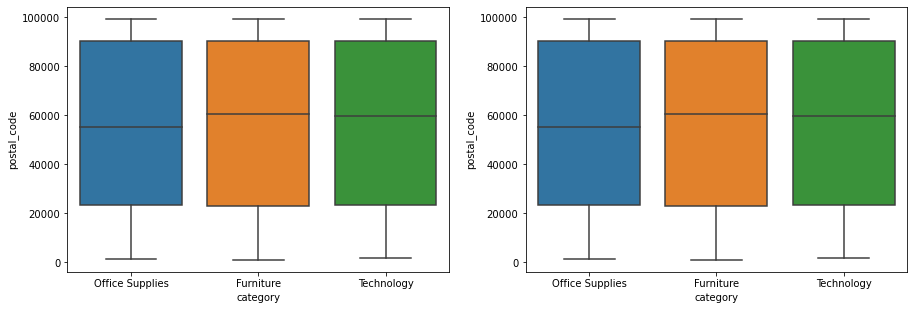

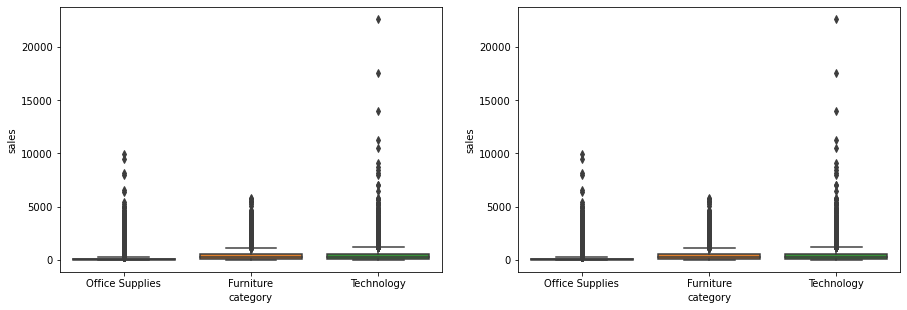

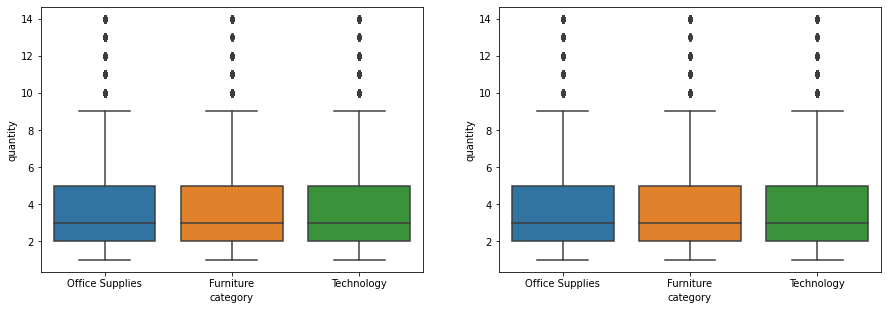

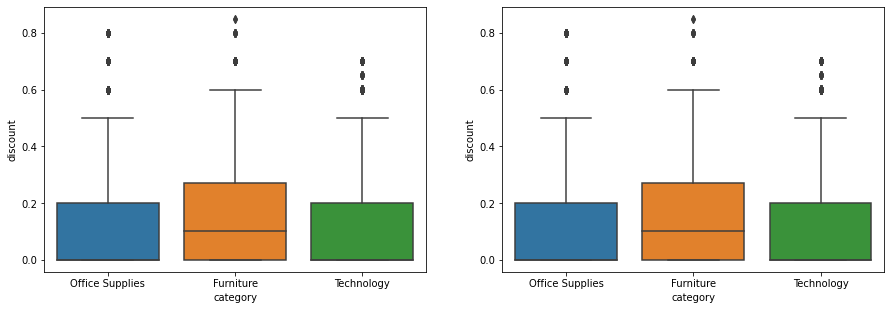

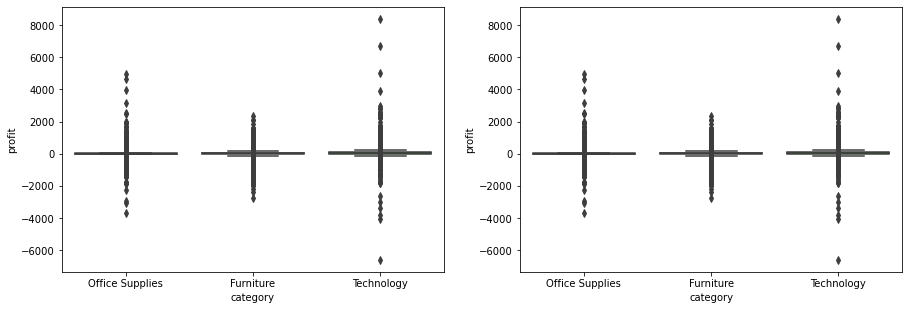

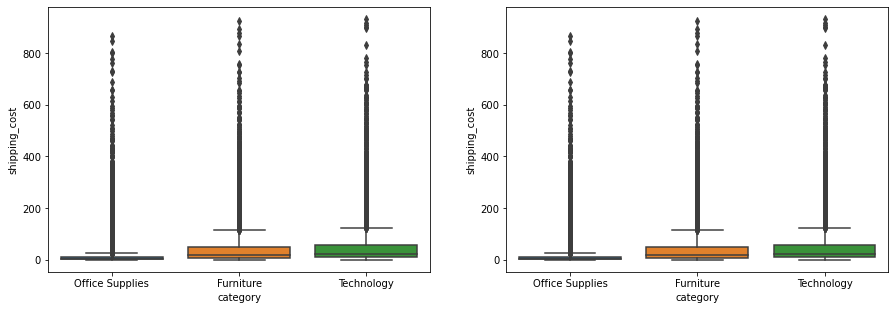

In [63]:
rows = len(numerical_columns); columns = categorical_attributes.shape[1]; plot = 0

for n_attribute in numerical_columns:
    fig(130, 40)
    plot += 1
    plt.subplot( rows, columns, plot )
    sns.boxplot( x='category', y = n_attribute, data=data )
    plot += 1
    plt.subplot( rows, columns, plot )
    sns.boxplot( x='category', y = n_attribute, data=data )
    
    plt.show()

## Feature Engineering
[&#8593;](#Agenda)

In [64]:
df = data.copy()

#### new_column_name_1
[&#8593;](#Agenda)

In [ ]:
df['new_column'] = ''' data_frame['column'] + - * / condition column to create new column'''

#### new_column_name_2
[&#8593;](#Agenda)

## Filters
[&#8593;](#Agenda)

### Column Selection
[&#8593;](#Agenda)

In [ ]:
to_drop = ['column_name','column_name','column_name','column_name']
df.drop(columns=to_drop, inplace=True)

### Row Selection
[&#8593;](#Agenda)

In [ ]:
df = df[(df['column_name'] CONDITION) ]

#df.query("")

## Business Answers
[&#8593;](#Agenda)

## Exploratory Data Analysis
[&#8593;](#Agenda)

In [65]:
temporary_desc = describe_data(df)
temporary_desc

Shape: (51290, 24)
Duplicates: False


,data_types,nan_count,nan_percentage
row_id,int64,0,0.00000
order_id,object,0,0.00000
order_date,datetime64[ns],0,0.00000
ship_date,object,0,0.00000
ship_mode,object,0,0.00000
customer_id,object,0,0.00000
customer_name,object,0,0.00000
segment,object,0,0.00000
city,object,0,0.00000
state,object,0,0.00000


In [66]:
temporary_desc['data_types'].unique()

array([dtype('int64'), dtype('O'), dtype('<M8[ns]'), dtype('float64')],
      dtype=object)

In [68]:
numerical_attributes = df.select_dtypes( include=['int64', 'float64'] )
categorical_attributes = df.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

### Univariate Analysis
[&#8593;](#Agenda)

#### Response Variable

> For Regression: 

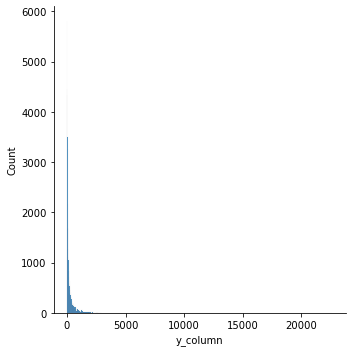

In [81]:
sns.displot(df['y_column']);

In [82]:
aux = df.loc[df['y_column'] <= df['y_column'].quantile(.90), 'y_column']
aux.agg(['mean', 'median'])

mean      127.17963
median     68.61000
Name: y_column, dtype: float64

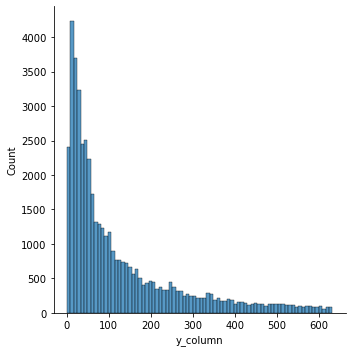

In [83]:
sns.displot(aux); # 90th quantile

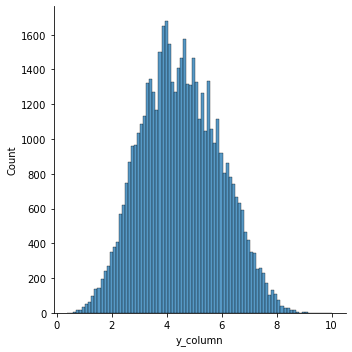

In [84]:
# Normalization (search about it)
sns.displot( np.log1p(df['y_column']) );

> For classification:

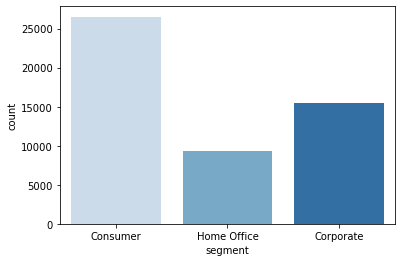

In [85]:
sns.countplot(data=df, x='y_column', palette='Blues');

#### Numerical Variables
[&#8593;](#Agenda)

    Explain them here. What do you see. What do they tell you...

In [96]:
correlations = pd.DataFrame(index=['correlation'])
for col in numerical_attributes.columns:
    correlations[col] = [numerical_attributes['y_column'].corr(numerical_attributes[col])]

correlations.T.sort_values('correlation')

,correlation
discount,-0.086722
row_id,-0.043889
postal_code,-0.023854
quantity,0.313577
profit,0.484918
shipping_cost,0.768073
sales,1.000000


In [97]:
correlations.T.abs().sort_values('correlation')

,correlation
postal_code,0.023854
row_id,0.043889
discount,0.086722
quantity,0.313577
profit,0.484918
shipping_cost,0.768073
sales,1.000000


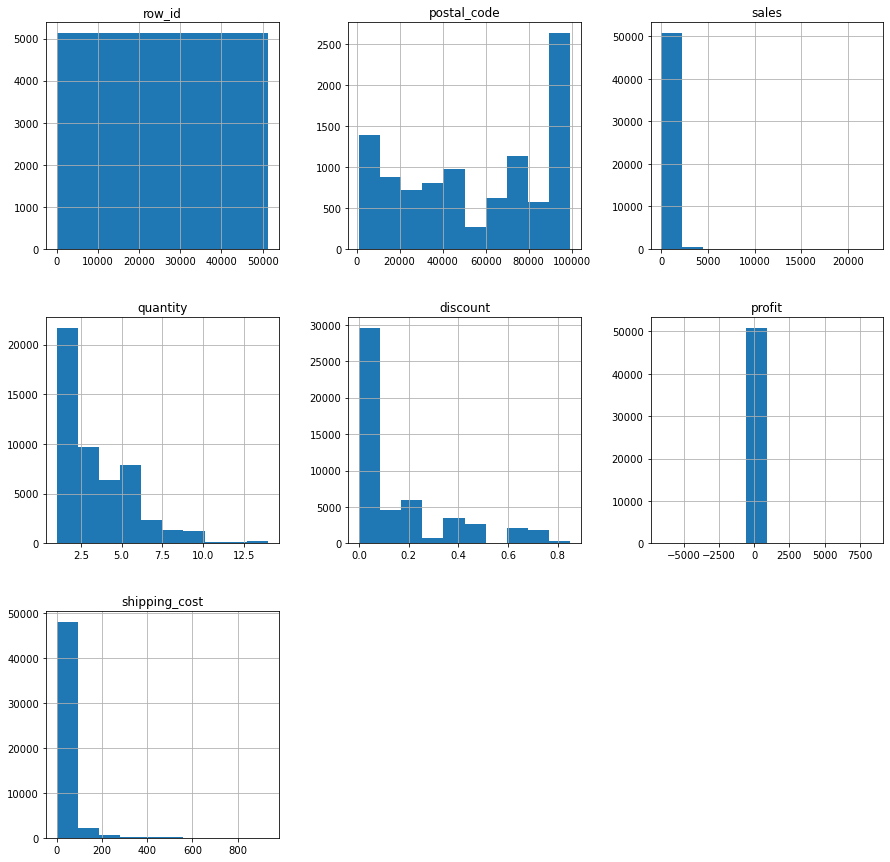

In [101]:
rows = int(np.ceil( numerical_attributes.shape[1]/3 ))
numerical_attributes.hist(figsize=(15,15), layout=(rows, 3));

**Removing Outliers**

In [104]:
no_outlier = numerical_attributes[(np.abs(stats.zscore(numerical_attributes, nan_policy='omit')) < .7).all(axis=1)]
no_outlier = no_outlier[['columns', 'to', 'analyze']]

In [106]:
no_outlier = df[df <= df.quantile(.90)].dropna()

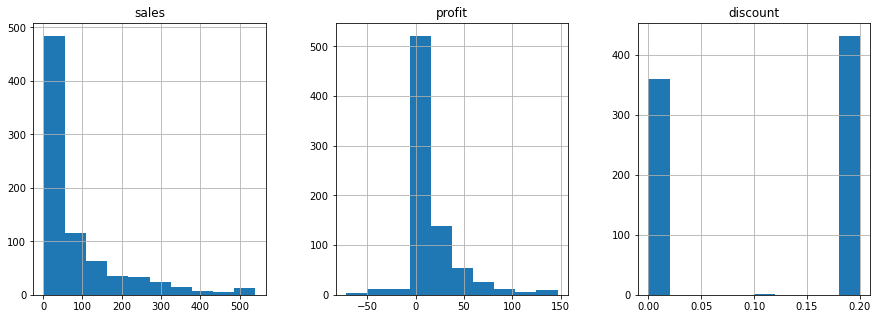

In [111]:
rows = int(np.ceil( no_outlier.shape[1]/3 ))
no_outlier.hist(figsize=(15, 5), layout=(rows, 3));

#### Categorical Variables
[&#8593;](#Agenda)

    sns.countplot() and sns.kdeplot()
    
    column_name according to categorical columns.

In [122]:
get_categories(categorical_attributes[['segment', 'ship_mode', 'order_priority']])

,segment,ship_mode,order_priority
0,Consumer,Standard Class,Medium
1,Home Office,Second Class,High
2,Corporate,First Class,Critical
3,,Same Day,Low


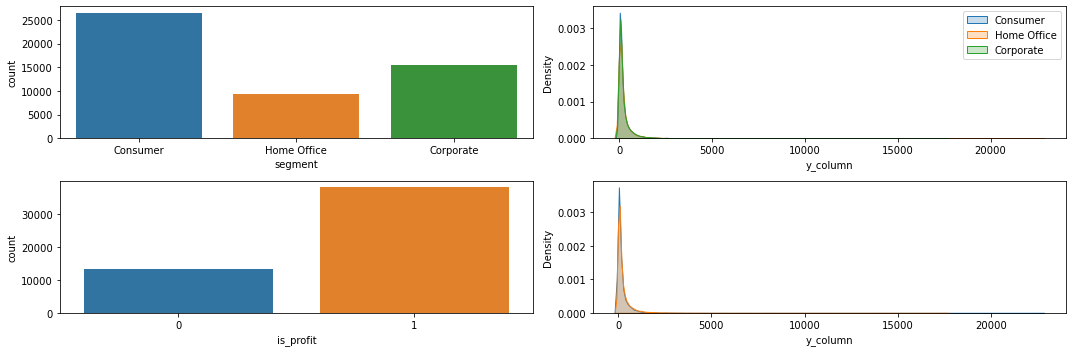

In [128]:
# For Regression Problems (continuous response_variable - y)
column = ['segment', 'is_profit']
classes1 = ['Consumer', 'Home Office', 'Corporate']
classes2 = [0, 1]
y_variable = 'y_column'

fig()
# categorical attribute 1
plt.subplot( 2, 2, 1 )
sns.countplot(x=df[column[0]])

plt.subplot( 2, 2, 2 )
sns.kdeplot(df[df[column[0]] == classes1[0]][y_variable], label=classes1[0], shade=True)
sns.kdeplot(df[df[column[0]] == classes1[1]][y_variable], label=classes1[1], shade=True)
sns.kdeplot(df[df[column[0]] == classes1[2]][y_variable], label=classes1[2], shade=True)
plt.legend()

# categorical attribute 2
plt.subplot(2, 2, 3 )
sns.countplot(x=df[column[1]])

plt.subplot( 2, 2, 4 )
sns.kdeplot(df[df[column[1]] == classes2[0]][y_variable], label=classes2[0], shade=True)
sns.kdeplot(df[df[column[1]] == classes2[1]][y_variable], label=classes2[1], shade=True)
plt.tight_layout()

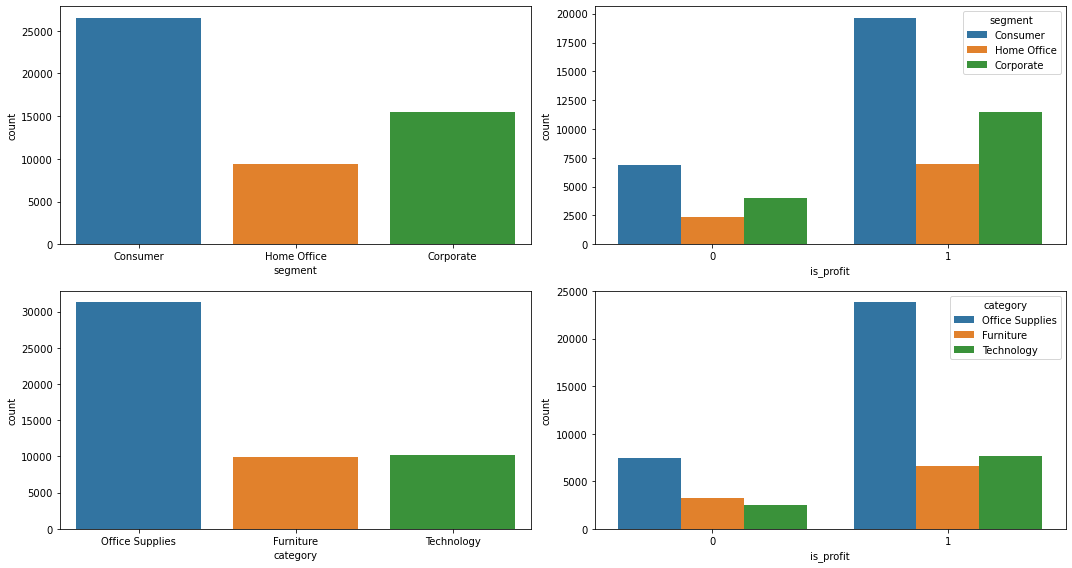

In [133]:
# For Cassification Problems 
category = ['segment', 'category']
y_variable = 'is_profit'

fig(15, 8)

# categorical attribute 1
plt.subplot( 2, 2, 1 )
sns.countplot(x=df[category[0]])

plt.subplot( 2, 2, 2 )
sns.countplot(x=y_variable, hue=category[0], data=df)

# categorical attribute 2
plt.subplot( 2, 2, 3 )
sns.countplot(x=df[category[1]])

plt.subplot( 2, 2, 4 )
sns.countplot(x=y_variable, hue=category[1], data=df)
plt.tight_layout()

### Bivariate Analysis
[&#8593;](#Agenda)

    Your Pandas knowledge will help you while validating the hypotheses, 
    since you have to manipulate the data (groupy, join, cut...) to create
    insights (graphs are welcome).
    
    New questions (hypotheses) are going to pop up in your mind, make sure
    to look for answers and try to listen to the story the data tells you.

#### _1. hypothesis._
                
> **Most valuable part of the answer**
>
> More information <br>
> or maybe a thought <br>
> (if needed).

**_Financial question... How does this affects the company, in terms of revenue?_**

        Maybe some explanation.

> **Most valuable part of the answer**
>
> More information <br>
> or maybe a thought <br>
> (if needed).

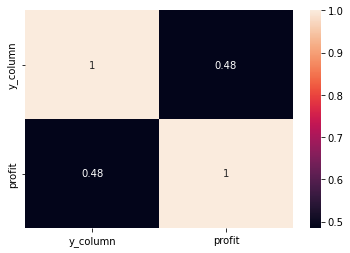

In [135]:
columns_used = ['column1', 'column2']
sns.heatmap( df[columns_used].corr( method='pearson' ), annot=True );

In [136]:
correlation(df[columns_used])

0.48491811261944706

### Multivariate Analysis
[&#8593;](#Agenda)


In [137]:
numerical_attributes = df.select_dtypes( include=['int64', 'float64'] )
categorical_attributes = df.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

#### Numerical
[&#8593;](#Agenda)


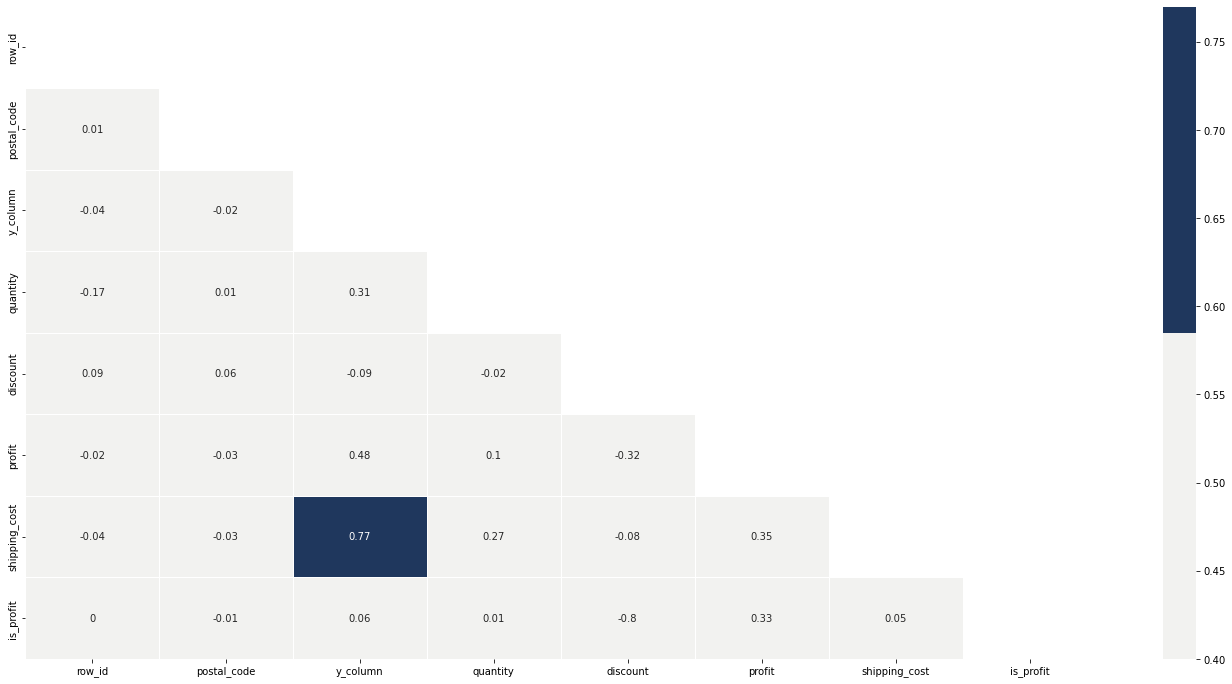

In [139]:
plt.figure(figsize=(24, 12))
correlations = numerical_attributes.corr().round(2)
mask = np.triu(np.ones_like(correlations, dtype=bool))
sns.heatmap(correlations, mask=mask, linewidths=1, annot=True, cmap=['#F2F2F0','#1F375D'], vmin=0.40) # vmax=-0.40
plt.show()

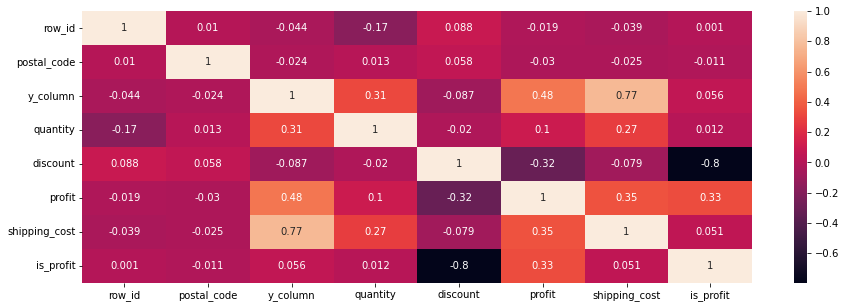

In [146]:
fig()
sns.heatmap(numerical_attributes.corr().round(3), annot=True )
plt.show()

#### Categorical
[&#8593;](#Agenda)

[Cramer's v](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)

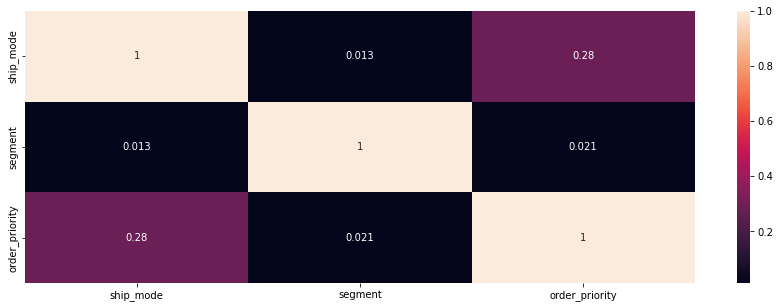

In [151]:
categorical_corr = get_categorical_corr(categorical_attributes[['ship_mode', 'segment', 'order_priority']])
fig()
sns.heatmap( categorical_corr, annot=True )
plt.show()

_**If you made it here, you already have insights that will help your business being successful. From here, you can go even further and start working on the machine learning to create a predictive solution (if needed).**_

## Dificulties and Solutions
[&#8593;](#Agenda)

## Next Steps
[&#8593;](#Agenda)

        [&#8593;](#Agenda)


        ## Agenda

        [Business Understanding](#Business-Understanding)<br> 
        &emsp;[Business Questions](#Business-Questions)<br>
        &emsp;[Hypothesis](#Hypothesis)<br>

        [Imports](#Imports)<br>
        &emsp;[Helper Functions and Classes](#Helper-Functions-and-Classes)<br>
        &emsp;&emsp;[Analysis](#Analysis)<br>
        &emsp;&emsp;[Graph](#Graph)<br>
        &emsp;&emsp;[Directory](#Directory)<br>
        &emsp;&emsp;[Database](#Database)<br>

        [Settings](#Settings)<br>

        [Loading Data](#Loading-Data)<br>

        [Describing Data](#Describing-Data)<br>
        &emsp;[Renaming Columns](#Renaming-Columns)<br>
        &emsp;[Dealing with Missing Values](#Dealing-with-Missing-Values)<br>
        &emsp;[Remap values](#Remap-values)<br>
        &emsp;[Change Data Types](#Change-Data-Types)<br>
        &emsp;[Duplicates](#Duplicates)<br>
        &emsp;[Descriptive Statistics](#Descriptive-Statistics)<br>
        &emsp;&emsp;[Numerical Attributes](#Numerical-Attributes)<br>
        &emsp;&emsp;[Categorical Attributes](#Categorical-Attributes)<br>

        [Feature Engineering](#Feature-Engineering)<br>
        &emsp;[new_column_name_1](#new_column_name_1)<br>
        &emsp;[new_column_name_2](#new_column_name_2)<br>

        [Filters](#Filters)<br>
        &emsp;[Column Selection](#Column-Selection)<br>
        &emsp;[Row Selection](#Row-Selection)<br>

        [Business Answers](#Business-Answers)<br>

        [Exploratory Data Analysis](#Exploratory-Data-Analysis)<br>
        &emsp;[Univariate Analysis](#Univariate-Analysis)<br>
        &emsp;&emsp;[Response Variable](#Response-Variable)<br>
        &emsp;&emsp;[Numerical Variables](#Numerical-Variables)<br>
        &emsp;&emsp;[Categorical Variables](#Categorical-Variables)<br>
        &emsp;[Bivariate Analysis](#Bivariate-Analysis)<br>
        &emsp;[Multivariate Analysis](#Multivariate-Analysis)<br>
        &emsp;&emsp;[Numerical](#Numerical)<br>
        &emsp;&emsp;[Categorical](#Categorical)<br>

        [Dificulties and Solutions](#Dificulties-and-Solutions)<br>

        [Next Steps](#Next-Steps)<br>